##**download the dataset**

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="VWBTrsiQOWQacmTwHIbb")
project = rf.workspace("social-interaction").project("products-qplqa")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.4/80.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 910.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to products-1 in yolov8:: 100%|██████████| 11606/11606 [00:03<00:00, 3399.97it/s]


#**Testing:**


 1. Load the YOLOv8 model file .
 2. Use OpenCV to read and preprocess an image, converting it from BGR to RGB format for visualization.
 3. The model makes predictions on the image, identifying objects and their bounding boxes.
 4. The object's class name and confidence score are displayed next to the bounding box on the image.
 5. Finally, a count of the detected objects per class is printed.




0: 640x640 1 tea, 477.4ms
Speed: 21.1ms preprocess, 477.4ms inference, 34.2ms postprocess per image at shape (1, 3, 640, 640)
Class: tea, Confidence: 0.96
1 tea(s) detected


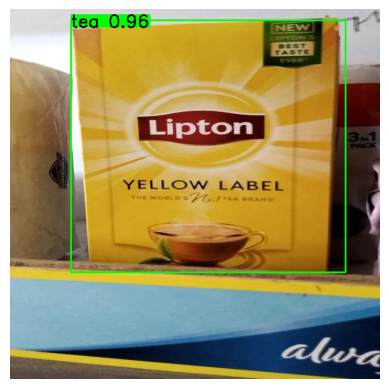

In [3]:

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO("/content/yolov8_model.pt")

image_path = "/content/products-1/test/images/12_mp4-0010_jpg.rf.11f4bf2cffadbda15a96389efefdbfd5.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = model.predict(image)
class_counts = {}
plt.imshow(image_rgb)

for result in results:
    boxes = result.boxes.xyxy
    confidences = result.boxes.conf
    class_ids = result.boxes.cls
    toilet_cleaners_boxes = []

    for box, confidence, class_id in zip(boxes, confidences, class_ids):
        if confidence > 0.5:
            x1, y1, x2, y2 = map(int, box)

            class_name = model.names[int(class_id)]

            print(f'Class: {class_name}, Confidence: {confidence:.2f}')

            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

            label = f"{class_name} {confidence:.2f}"
            font_scale = 1.0
            thickness = 2
            label_size, _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, thickness)
            label_y1 = max(y1 - 10, 0)
            label_y2 = label_y1 + label_size[1]

            cv2.rectangle(image_rgb, (x1, label_y1), (x1 + label_size[0], label_y2), (0, 255, 0), -1)

            cv2.putText(image_rgb, label, (x1, label_y2), cv2.FONT_HERSHEY_SIMPLEX, font_scale, (0, 0, 0), thickness)  # Black text

            toilet_cleaners_boxes.append((x1, y1, x2, y2))

            if class_name in class_counts:
                class_counts[class_name] += 1
            else:
                class_counts[class_name] = 1

for class_name, count in class_counts.items():
    print(f'{count} {class_name}(s) detected')

plt.axis('off')
plt.imshow(image_rgb)
plt.show()

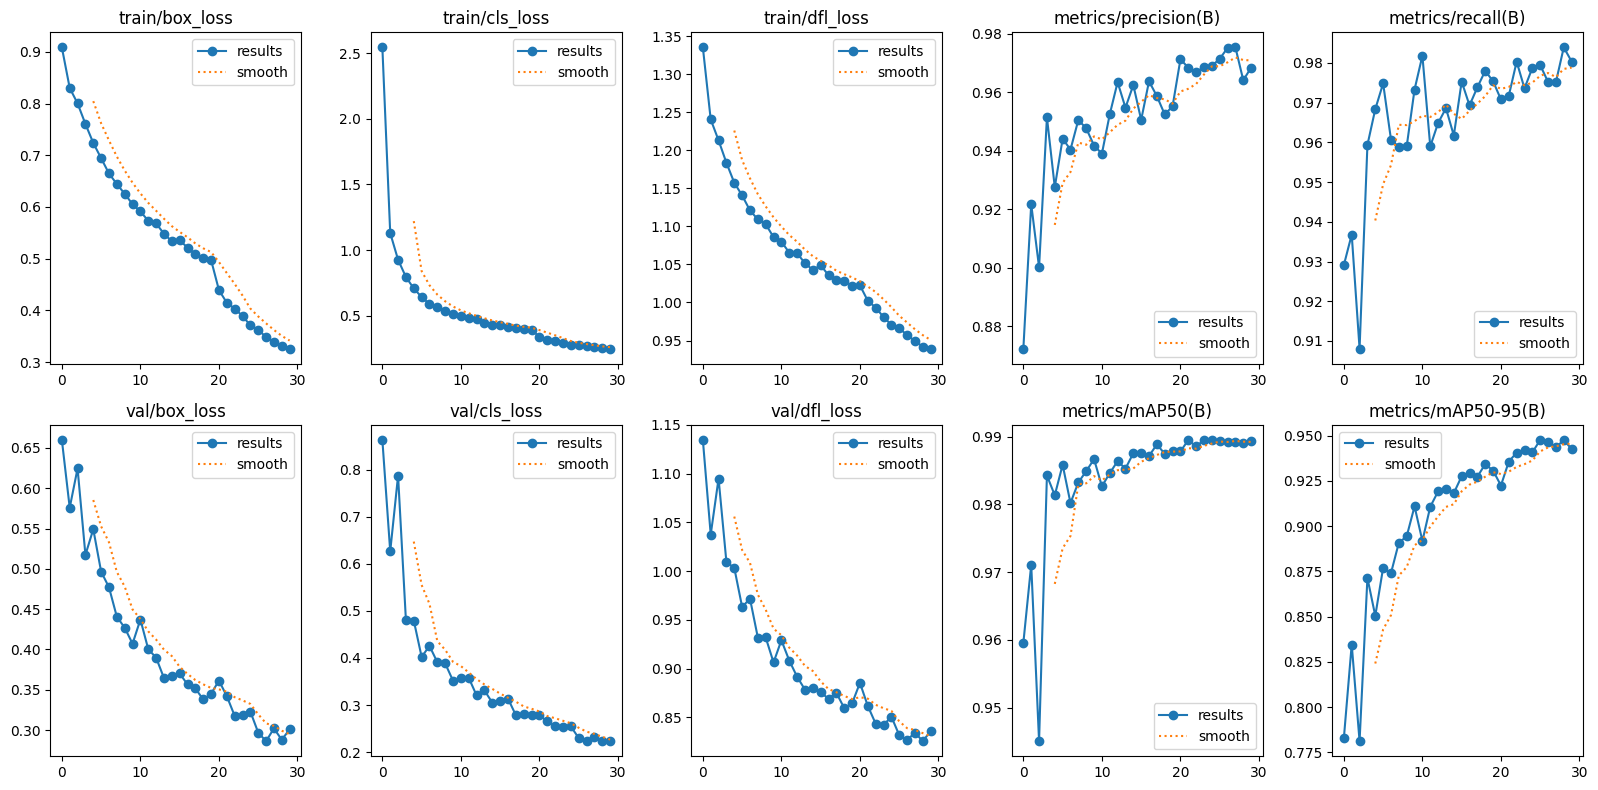

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = '/content/results.csv'
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

fig, axes = plt.subplots(2, 5, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

columns = [
    ('train/box_loss', 'train/box_loss'),
    ('train/cls_loss', 'train/cls_loss'),
    ('train/dfl_loss', 'train/dfl_loss'),
    ('metrics/precision(B)', 'metrics/precision(B)'),
    ('metrics/recall(B)', 'metrics/recall(B)'),
    ('val/box_loss', 'val/box_loss'),
    ('val/cls_loss', 'val/cls_loss'),
    ('val/dfl_loss', 'val/dfl_loss'),
    ('metrics/mAP50(B)', 'metrics/mAP50(B)'),
    ('metrics/mAP50-95(B)', 'metrics/mAP50-95(B)')
]


for idx, (col, title) in enumerate(columns):
    if col in df.columns:
        axes[idx].plot(df.index, df[col], label='results', marker='o')
        axes[idx].plot(df.index, df[col].rolling(window=5).mean(), label='smooth', linestyle='dotted')
        axes[idx].set_title(title)
        axes[idx].legend()
    else:
        print(f"Column {col} not found in CSV.")

plt.tight_layout()
plt.show()
